# Team H - Project 3

## <목차>
-  0. 주안점
-  1. 프로그램 개요
-  2. 클래스 다이어그램
-  3. 코드 설명
-  4. 실행

## 0. 주안점

### 1) 사용자 편의성
- Main 클래스(사용자 인터페이스)
- 가독성 좋은 출력 서식
- 물건(상품)과 사람(캐릭터)에 고유 코드 부여

### 2) 추가 기능 구현
- 영수증 출력
- 재고 목록 출력
- 편의점 이용 정보 조회

## **1. 프로그램 개요**

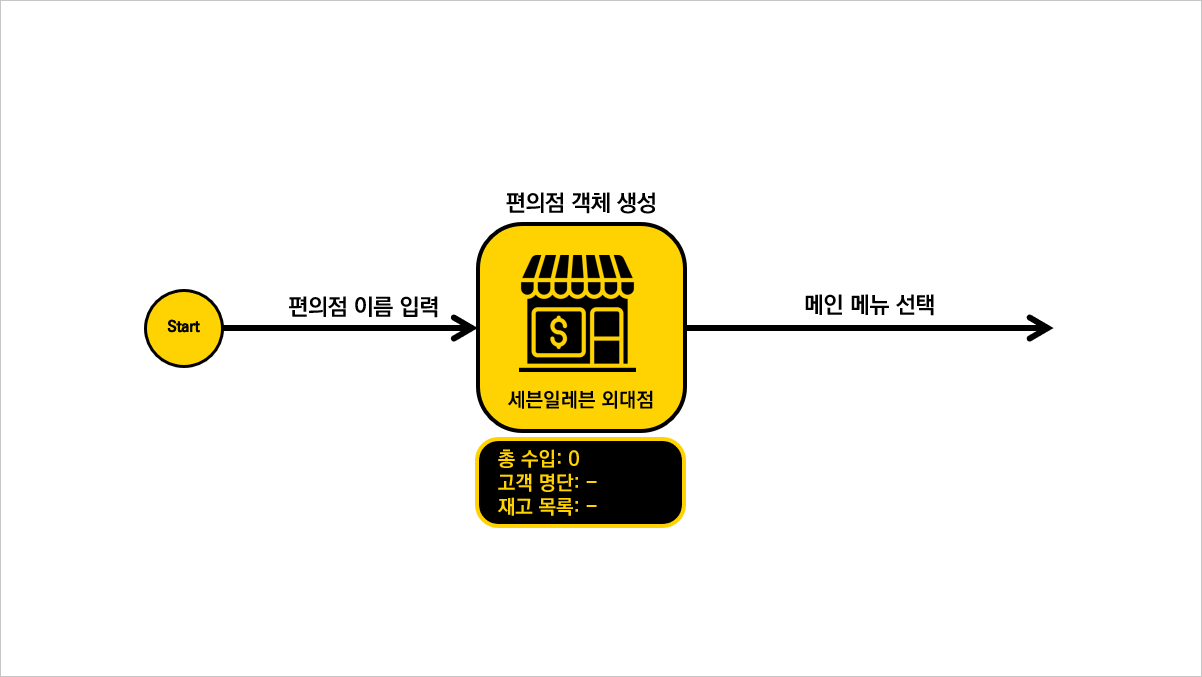

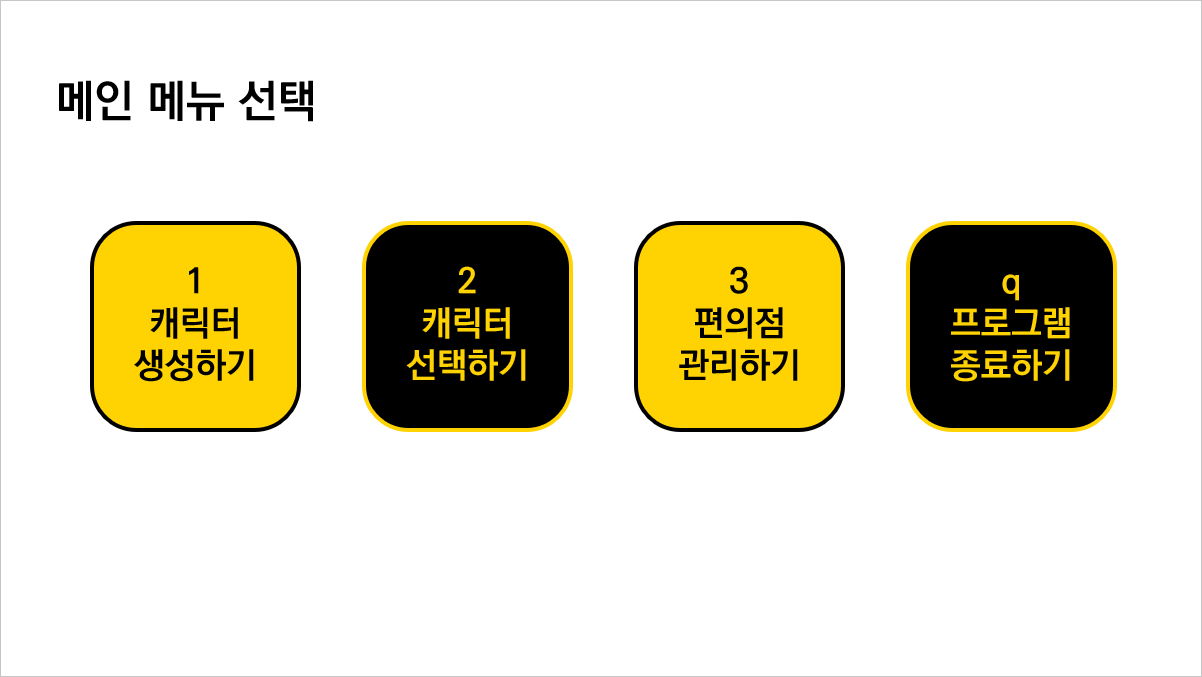

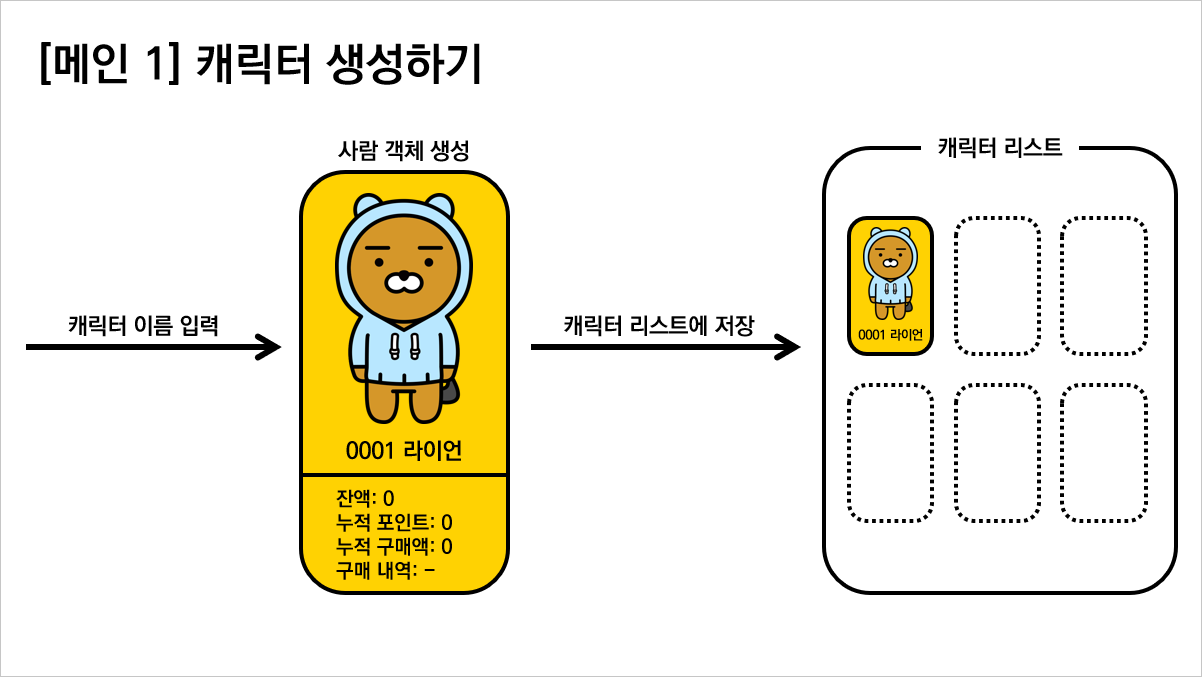

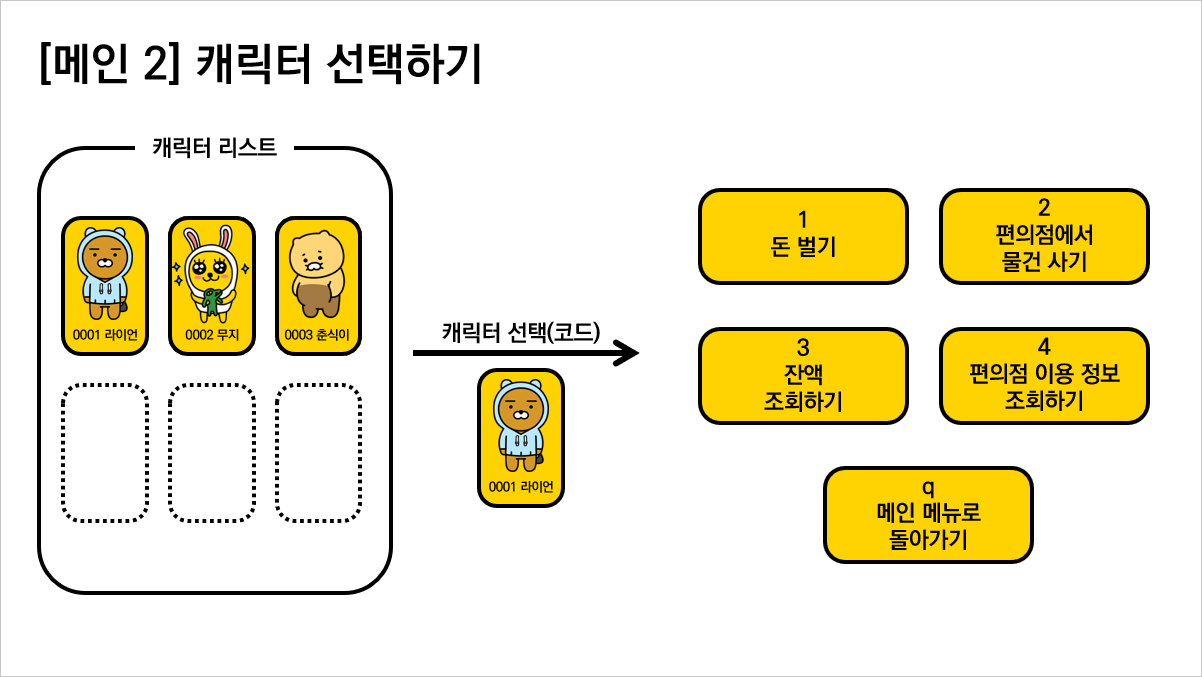

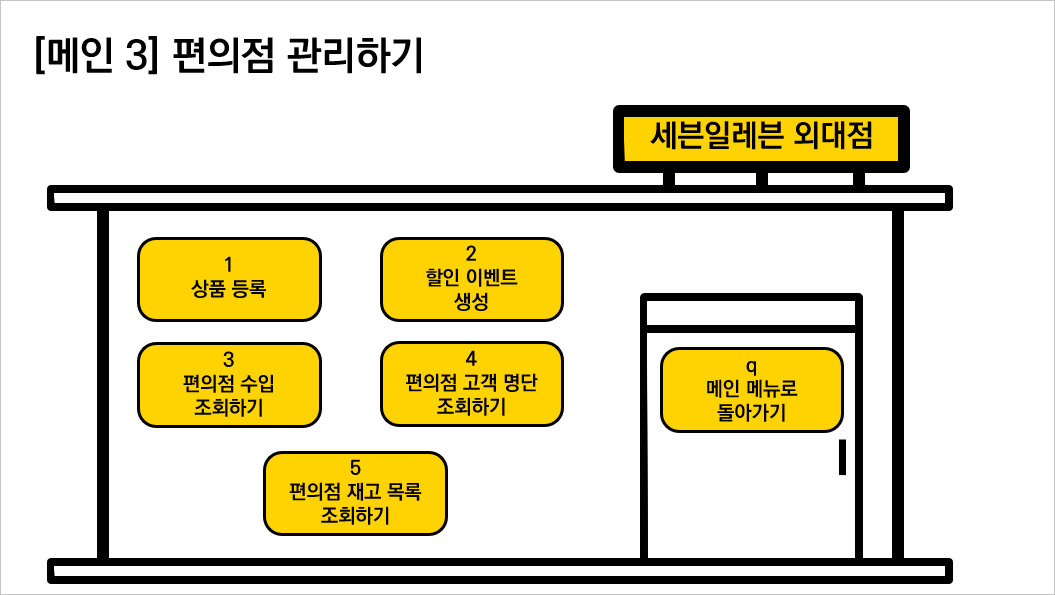</img>

## **2. 클래스 다이어그램**

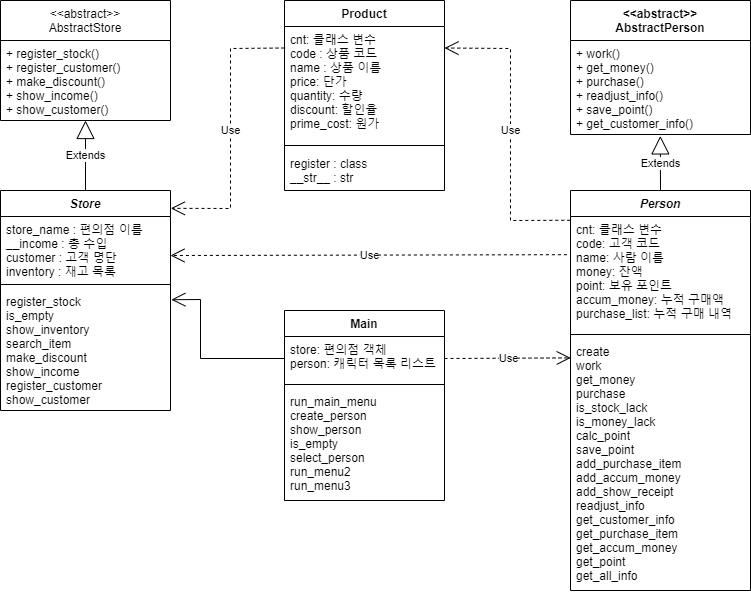

## **3. 코드 설명**

## **3-1. import**

In [ ]:
from abc import abstractmethod, ABCMeta

## **3-2. Product 클래스**

In [ ]:
class Product:
    cnt = 0
    
    def __init__(self, name, price, quantity, discount=0):
        Product.cnt += 1
        self.code = Product.cnt   # 상품 코드
        self.name = name          # 상품명
        self.price = price        # 단가
        self.quantity = quantity  # 수량
        self.discount = discount  # 할인율
        self.prime_cost = price   # 원가
    
    @classmethod
    def register(cls, info):
        """상품의 이름, 가격, 수량 정보를 가지고 상품을 등록하는 클래스 메서드."""
        return cls(info[0], info[1], info[2])

    def __str__(self):
        """상품 정보를 가독성 있게 출력하기 위한 함수."""
        return f'  상품코드: {str(self.code)} | 상품명: {self.name} | 단가: \
{str(self.price)}원 | 수량: {str(self.quantity)}개 | 할인율: {str(self.discount)}%'

## **3-3. Store 추상 클래스**

In [ ]:
class AbstractStore(metaclass=ABCMeta):
    name = '편의점 이름'
    income = '총 수입'
    customer = '고객 명단'
    inventory = '재고 목록'
    
    @abstractmethod
    def register_stock(self):
        name = '입고하고자 하는 상품명'
        price = '입력받은 단가'
        quantity = '입력받은 입고 수량'
    
    @abstractmethod
    def make_disaccount(self):
        pass

In [ ]:
    @abstractmethod
    def show_income(self):
        pass
    
    @abstractmethod
    def register_customer(self, code, name):
        code = '고객 코드'
        name = '고객 이름'
        pass
        
    @abstractmethod
    def show_customer(self):
        pass

In [ ]:
    @abstractmethod
    def is_empty(self):
        pass
    
    @abstractmethod
    def show_inventory(self):
        pass
    
    @abstractmethod
    def search_item(self, code):
        code = '고객 코드'
        pass

## **3-4. Store 클래스**

In [ ]:
class Store:
    def __init__(self, store_name):
        self.store_name = store_name # 편의점 이름
        self.__income = 0 # 총 수입 
        self.customer = [] # 고객 명단
        self.inventory = [] # 재고 목록(제품명)
    
    @property
    def income(self):
        return self.__income
    
    @income.setter
    def income(self, input_income):
        self.__income = input_income

In [ ]:
    # 상품 입고
    def register_stock(self):
        name = input('입고할 물건: ')
        price = int(input('물건 단가(원): '))
        quantity = int(input('입고 수량(개): '))
        stock_info = name, price, quantity
        new_product = Product.register(stock_info)
        self.inventory.append(new_product)
    
    # 재고 목록 조회
    def show_inventory(self):
        line = '-' * 70
        print('<재고 목록>')
        print(line)
        for item in self.inventory:
            print(item)
        print(line)

In [ ]:
    # 할인 이벤트 생성
    def make_discount(self):
        if self.is_empty(): 
            print('할인 이벤트를 할 수 있는 상품이 존재하지 않습니다.')
            return 
        self.show_inventory()
        code = input('할인 이벤트를 할 상품 코드를 입력하세요: ')
        if code == 'q':
            print('할인 이벤트를 적용하지 않습니다.')
            return None
        if not code.isdigit():
            print('상품코드를 정확히 입력해주세요.')
            return self.make_discount()   
        item = self.search_item(int(code))
        if not item:
            return self.make_discount()
        
        item.discount = int(input('적용할 할인율(%): '))
        discount_price = item.prime_cost * (1 - (item.discount * 0.01))
        item.price = int(discount_price)

In [ ]:
    # 총 수입 조회
    def show_income(self):
        print(f'{self.store_name} 총 수입: {self.income}원')
    
    # 고객 등록
    def register_customer(self, code, name):
        for customer in self.customer:
            if code == customer[0]:
                return
        self.customer.append((code, name))
        self.customer.sort(key=lambda x:x[0])
    
    # 고객 명단 조회
    def show_customer(self):
        line = '-' * 25
        print(f'{self.store_name} <고객 명단>')
        print(line)
        print(' <코드>')
        for code, name in self.customer:
            print(f'  {code:0>4} | {name}')
        print(line)

In [ ]:
    # 재고 목록 비어있는지 확인(편의점에 상품 목록이 하나라도 존재하는지)
    def is_empty(self):
        if not self.inventory:
            print(f'{self.store_name}에 아무 상품도 없습니다.')
            return True
        return False   
    # 상품코드로 재고 목록에 상품 존재 여부 확인
    def search_item(self, code):
        for item in self.inventory:
            if item.code == code:
                return item
        print('상품을 찾지 못했습니다.')
        return None

## **3-5. Person 추상 클래스**

In [ ]:
class AbstractPerson(metaclass=ABCMeta):
    name = '사람 이름'
    money = '잔액'
    accum_money = '누적 구매액'
    point = '누적 포인트'
    purchase_list = '구매 내역'
    
    @abstractmethod
    def work(self):
        print('열심히 일했습니다.')
        
    @abstractmethod
    def get_money(self):
        return self.money
    
    @abstractmethod
    def purchase(self, store):
        pass

In [ ]:
    @abstractmethod
    def readjust_info(self, store, item, amount, total):
        pass
    
    @abstractmethod
    def save_point(self, new_point):
        pass
    
    @abstractmethod
    def get_customer_info(self):
        pass

## **3-6. Person 클래스**

In [ ]:
class Person(AbstractPerson):
    cnt = 0 # 사람 코드
    def __init__(self, name):
        Person.cnt += 1
        self.code = Person.cnt
        self.name = name
        self.money = 0       
        self.accum_money = 0
        self.point = 0
        self.purchase_list = dict()
    
    # 사람(캐릭터) 생성
    @classmethod
    def create(cls, name):
        return cls(name)   
    
    # 일해서 돈 벌기
    def work(self):
        super().work()
        self.money += int(input('일해서 번 돈(원): '))

In [ ]:
    # 물건 구매
    def purchase(self, store):
        if store.is_empty():
            print('구매할 수 있는 상품이 없습니다.')
            return None
        
        store.show_inventory()
        
        code = input('구매할 상품 코드를 입력하세요(q-끝내기): ')
        if code == 'q':
            print('구매를 철회했습니다.')
            return None
        if not code.isdigit():
            print('상품 코드를 정확히 입력해주세요.')
            return self.purchase(store)
        
        item = store.search_item(int(code))
        
        if not item:
            return self.purchase(store)

In [ ]:
        quantity = input('구매할 수량을 입력하세요: ')
        if not quantity.isdigit():
            print('구매할 수량을 정확히 입력해주세요.')
            return self.purchase(store)
        quantity = int(quantity)
        total_price = item.price * quantity
        
        # 재고 부족 체크
        if self.is_stock_lack(item, quantity):
            return self.purchase(store)
        
        # 잔액 부족 체크
        if self.is_money_lack(total_price):
            return self.purchase(store)
        
        # 구매 성공
        print('구매가 완료되었습니다.')
        self.show_receipt(store, item, quantity, total_price) # 영수증
        self.readjust_info(store, item, quantity, total_price) # 재조정
        self.get_money() # 잔액 출력

In [ ]:
    # 잔액 조회
    def get_money(self):
        print(f'\n잔액(가용 금액): {self.money}원')
        
    # 구매하려는 수량보다 재고가 적지 않은지 체크
    @staticmethod
    def is_stock_lack(item, amount):
        if amount > item.quantity:
            print(f'재고 부족! {item.name}(은/는) 최대 {item.quantity}개 구매 가능합니다.')
            return True
        
    # 잔액이 부족하지 않은지 체크
    def is_money_lack(self, price):
        if self.money < price:
            print(f'잔액 부족! {price - self.money}원 부족합니다.')
            return True  

In [ ]:
    # 구매 영수증 출력
    def show_receipt(self, store, item, amount, total):
        wave_line = '~' * 50
        new_point = self.calc_point(total)
        print(wave_line)
        print(f'''
    <구매 영수증>
    
    구매처: {store.store_name}
    고객명: {self.name}

    구매 상품:
      {item.name} | 단가: {item.price}원 | 수량: {amount}개
      
    구매 총액:
      {total}원
      
    적립 포인트:
      + {new_point}P (총 {self.point + new_point}P)
        ''')
        print(wave_line)

In [ ]:
    # 구매 후 재고 수량, 포인트, 잔액 등 정보 수정
    def readjust_info(self, store, item, amount, total):
        item.quantity -= amount # 재고 - 구매수량
        store.income += total # 편의점 수입 증가
        self.money -= total # 잔액 감소
        self.save_point(self.calc_point(total)) # 포인트 적립
        self.add_accum_money(total) # 누적 구매액 증가
        self.add_purchase_item(item.name, amount) # 구매 내역에 추가        
        store.register_customer(self.code, self.name) # 고객 등록

In [ ]:
    # 포인트 계산
    @staticmethod
    def calc_point(purchase_price):    
        saving_ratio = 0.05
        return int(purchase_price * saving_ratio)
    
    # 포인트 적립
    def save_point(self, new_point):
        self.point += new_point
        
    # 구매 내역에 추가
    def add_purchase_item(self, item_name, item_quantity):
        if item_name in self.purchase_list:
            self.purchase_list[item_name] += item_quantity
        else: self.purchase_list[item_name] = item_quantity
    
    # 누적 구매액 증가
    def add_accum_money(self, purchase_price):
        self.accum_money += purchase_price

In [ ]:
    # 구매 정보 조회
    def get_customer_info(self):
        wave_line = '~' * 30
        info_menu_msg = f'''
<{self.name} 고객님 매장 이용 정보 조회>
조회할 항목의 메뉴를 입력해주세요.
-----------------------------
    1) 구매 내역
    2) 누적 구매액
    3) 누적 포인트
    4) 모두 조회
    q) 나가기
------------------------------
입력 >>> '''
        info_menu = input(info_menu_msg)

In [ ]:
        if info_menu == '1':
            info = self.get_purchase_items()
        elif info_menu == '2':
            info = self.get_accum_money()
        elif info_menu == '3':
            info = self.get_point()
        elif info_menu == '4':
            info = self.get_all_info()
        elif info_menu == 'q':
            print('정보 조회를 종료합니다.')
            return       
        else:
            print('없는 메뉴를 입력하셨습니다.')
            return self.get_customer_info()
        print(wave_line)
        print(info)
        print(wave_line)
        return self.get_customer_info()

In [ ]:
    # 구매 내역 조회
    def get_purchase_items(self):
        output = '\n<구매 내역>\n'
        for item, num in self.purchase_list.items():
            output += f'  {item:5s}| {num:2d}개\n'
        return output
    
    # 누적 구매액 조회
    def get_accum_money(self):
        output = '\n<누적 구매액>\n'
        return output + f'  {self.accum_money} 원\n'
    
    # 누적 포인트 조회
    def get_point(self):
        output = '\n<누적 포인트>\n'
        return output + f'  {self.point} P\n'

In [ ]:
    # 3가지 구매 정보 모두 조회
    def get_all_info(self):
        output = f'\n{self.name} 고객님 정보\n'
        items = self.get_purchase_items()
        amount = self.get_accum_money()
        point = self.get_point()
        return output + items + amount + point

## **3-7. Main 클래스**

In [ ]:
class Main:
    def __init__(self):     
        store_name = input('편의점 이름: ')
        self.store = Store(store_name)
        self.person = []

In [ ]:
    def run_main_menu(self):
        while True:
            menu = input('''
[메인 메뉴]
============================
    1) 사람(캐릭터) 생성
    2) 사람(캐릭터) 선택
    3) 편의점 관리하기
    q) 프로그램 종료하기
============================
입력>>> ''')           

In [ ]:
            if menu == '1':
                self.create_person()
            elif menu == '2':
                person = self.select_person()
                if person:
                    self.run_menu2(person)
            elif menu == '3':
                self.run_menu3()
            elif menu == 'q':
                print('프로그램을 종료합니다.')
                break
            else:
                print('잘못 선택하셨습니다.')

In [ ]:
    def create_person(self):
        name = input('생성할 사람(캐릭터) 이름 입력: ')
        person = Person.create(name)
        self.person.append(person)
        
    def show_person(self):
        line = '-' * 25
        print('사람(캐릭터) 코드를 선택하세요')
        print(line)
        print(' <코드>')
        for person in self.person:
            print(f'  {person.code:0>4} | {person.name}')
        print(line)

In [ ]:
    def is_empty(self):
        if not self.person:
            print('사람(캐릭터)이 없습니다.')
            return True
        
    def select_person(self):
        if self.is_empty():
            return None
        self.show_person()
        num = input('사람(캐릭터) 코드 선택: ')
        for person in self.person:
            if num.isdigit() and person.code == int(num):
                return person
        print('없는 사람(캐릭터)입니다.')
        return None

In [ ]:
    def run_menu2(self, character):
        while True:
            menu = input(f'''
<현재 캐릭터: {character.name}>
=================================
    1) 돈 벌기
    2) 편의점에서 물건 사기
    3) 잔액 조회하기
    4) 편의점 이용 정보 조회하기
    q) 메인으로 돌아가기
=================================
입력>>> ''')

In [ ]:
            if menu == '1':
                character.work()
            elif menu == '2':
                character.purchase(self.store)
            elif menu == '3':
                character.get_money()
            elif menu == '4':
                character.get_customer_info()
            elif menu == 'q':
                print('사람(캐릭터) 플레이를 종료합니다.')
                break
            else: print('잘못 선택하셨습니다.')

In [ ]:
    def run_menu3(self):
        while True:
            menu = input('''
<편의점 관리하기>
=========================
    1) 물건 등록
    2) 할인 이벤트 생성
    3) 수입 조회
    4) 고객 명단 조회
    5) 재고 목록 조회
    q) 메인으로 돌아가기
=========================
입력>>> ''')

In [ ]:
            if menu == '1':
                self.store.register_stock()
            elif menu == '2':
                self.store.make_discount()
            elif menu == '3':
                self.store.show_income()
            elif menu == '4':
                self.store.show_customer()
            elif menu == '5':
                self.store.show_inventory()
            elif menu == 'q':
                print('편의점 관리를 종료합니다.')
                break
            else: print('잘못 선택하셨습니다.')

## **3-8. main 함수**

In [ ]:
def main():
    execution = Main()
    execution.run_main_menu()
    
main()

## **4. 실행**

In [2]:
from abc import abstractmethod, ABCMeta

class Product:
    """
    상품 객체를 생성하기 위해 사용되는 클래스.

    속성:
        cnt: int, 상품의 고유코드를 생성하기 위한 클래스 변수. 객체가 생성될 때마다 1씩 값이 증가함.
        cnt: int, 상품의 고유코드를 나타내는 인스턴스 변수. 객체 생성 시 클래스 변수인 cnt값을 전달받음.
        name: str, 상품 이름.
        price: int, 상품 단가.
        quantity: int, 상품 수량.
        discount: int, 상품 할인율.(기본값=0)
        prime_cost: int, 상품 원가.

    메서드:
        register(info): (상품 이름, 가격, 수량) 정보가 포함된 튜플을 인자로 받아 상품을 등록한다.
    """
    cnt = 0
    
    def __init__(self, name, price, quantity, discount=0):
        """
        상품의 고유코드(code), 이름(name), 가격(price), 
        수량(quantity), 할인율(discount)을 초기화하는 생성자 함수.

        입력:
            name: str, 상품 이름.
            price: int, 상품 단가.
            quantity: int, 상품 수량.
            discount: int, 상품 할인율.(기본값=0)

        기능:
            객체가 새롭게 생성될 때 마다 Product.cnt의 값을 1 만큼 증가시킨 후 상품 고유 코드(code)로 할당한다.

        """
        Product.cnt += 1
        self.code = Product.cnt 
        self.name = name
        self.price = price
        self.quantity = quantity
        self.discount = discount
        self.prime_cost = price # 원가
    
    @classmethod
    def register(cls, info):
        """
        상품의 이름, 가격, 수량 정보를 가지고 상품을 등록하는 클래스 메서드.
        
        입력:
            info: tuple, (상품명, 가격, 수량 정보)로 구성된 튜플.
    
        출력:
            Product 객체
    
        기능:
            튜플 형식으로 전달 받은 상품 정보 인자로 Product 객체를 생성한다.
        """
        return cls(info[0], info[1], info[2])

    def __str__(self):
        """
        상품 정보를 가독성 있게 출력하기 위한 함수.

        출력:
            상품코드, 상품명, 단가, 수량, 할인율이 포함된 문장

        기능:
            기존 __str__의 문자열 반환기능을 오버라이딩하여 return 값의 형식대로 출력되도록 한다.        
        """
        
        return f'  상품코드: {str(self.code)} | 상품명: {self.name} | 단가: \
{str(self.price)}원 | 수량: {str(self.quantity)}개 | 할인율: {str(self.discount)}%'

class AbstractStore(metaclass=ABCMeta):
    """
    Store 클래스의 추상 클래스.
    
    속성:
        name: 편의점 이름.
        income: 총 수입.
        customer: 고객 명단.
        inventory: 재고 목록.
    
    메서드:
        register_stock: 재고 목록에 상품을 등록한다.
        is_empty: 재고 목록이 비었는지 확인한다.
        show_inventory: 재고 목록을 출력한다.
        search_item: 고객이 구매할 물건을 재고 목록에서 찾는다.
        make_discount: 특정 물건에 대한 할인 이벤트를 생성한다.
        show_income: 매장의 수입을 확인한다.
        register_customer: 매장에서 상품을 구매한 고객을 고객 명단에 등록한다.
        show_customer: 고객 명단을 출력한다.
    """
    name = '편의점 이름'
    income = '총 수입'
    customer = '고객 명단'
    inventory = '재고 목록'
    
    @abstractmethod
    def register_stock(self):
        """재고에 상품을 등록한다."""
        name = '입고하고자 하는 상품명'
        price = '입력받은 단가'
        quantity = '입력받은 입고 수량'
    
    @abstractmethod
    def is_empty(self):
        """재고 목록이 비었는지 확인한다."""
        pass
    
    @abstractmethod
    def show_inventory(self):
        """재고 목록을 출력한다."""
        pass
    
    @abstractmethod
    def search_item(self, code):
        """고객이 입력한 코드를 가진 상품을 재고에서 찾는다."""
        code = '고객 코드'
        pass
    
    @abstractmethod
    def make_disaccount(self):
        """특정 상품에 대한 할인 이벤트를 생성한다."""
        pass
    
    @abstractmethod
    def show_income(self):
        """매장의 수입 정보를 출력한다."""
        pass
    
    @abstractmethod
    def register_customer(self, code, name):
        """매장의 상품을 구매한 고객을 고유 코드와 함께 고객 명단에 추가한다."""
        code = '고객 코드'
        name = '고객 이름'
        pass
        
    @abstractmethod
    def show_customer(self):
        """고객 명단을 출력한다.""" 
        pass

class Store:
    """
    편의점 객체를 생성하기 위해 사용되는 클래스.

    속성:
        store_name: str, 편의점 이름. 총 수입(income), 고객 명단(customer), 재고목록(inventory)
        __income: int, 편의점의 총 수입. 은닉된 정보. 0으로 초기화
        customer: list, 고객 명단. 각 고객의 정보는 (고객 코드, 고객명) 형식의 튜플로 리스트에 담겨있음. 
        inventory: list, 재고목록. 각 재고의 정보는 (상품명, 상품가격, 상품수량) 형식의 튜플로 리스트에 담겨있음.

    메서드:
        register_stock: 상품에 관한 정보를 입력받아 Product 객체를 생성하고, 상품 객체를 재고 목록에 등록한다.
        is_empty: 재고 목록이 비었는지 확인한다.
        show_inventory: 재고 목록을 출력한다.
        search_item: 상품 코드를 인자로 받아, 해당 코드를 가진 상품을 찾는다. 
        make_discount: 특정 상품에 할인 이벤트를 적용한다. 
        show_income: 편의점의 총 수입을 출력한다.
        register_customer: 고객의 고유코드와 이름으로 고객 정보를 고객 명단에 등록한다.
        show_customer: 고객 명단을 출력한다. 


    """
    def __init__(self, store_name):
        """
        편의점 이름(store_name), 총 수입(income), 고객 명단(customer), 
        재고 목록(inventory)을 초기화하는 생성자 함수.
        
        입력:
            store_name: str, 편의점 이름.

        기능:
            편의점 이름은 객체 생성 시 전달 받은 인자로 초기화한다.
            총 수입의 초기값은 0으로 초기화한다.
            고객명단과 재고 목록은 빈 리스트로 초기화한다.
        """     
        
        self.store_name = store_name # 편의점 이름
        self.__income = 0 # 총 수입 
        self.customer = [] # 고객 명단
        self.inventory = [] # 재고 목록(제품명)
    
    @property
    def income(self):
        """
        보안을 위해 은닉된 총 수입(income)을 조회하기 위한 함수.

        출력:
            __income: int, 총 수입.

        기능:
            은닉된 총 수입 변수에 접근해 리턴 받을 수 있게 한다.
        """
        return self.__income
    
    @income.setter
    def income(self, input_income):
        """
        보안을 위해 은닉된 총 수입(income)을 변경하기 위한 함수.
        
        입력:
            input_income: int, 변경할 총 수입.

        기능:
            은닉된 총 수입 변수에 접근해 입력받은 함수의 인자(input_income)로 값을 변경한다.
        """
        self.__income = input_income
    
    # 상품 입고
    def register_stock(self):
        """
        상품에 관한 정보를 입력받은 뒤 Product 객체를 생성하고 상품을 재고 목록에 등록하는 함수.
        
        기능:
            상품 이름(name), 단가(price), 수량(quantity) 정보를 입력받는다.
            입력 받은 정보를 튜플 형태로 만든다.
            튜플을 Product 클래스의 register 함수의 매개변수로 전달하여 Product 객체를 생성한다.
            만들어진 상품 객체를 재고 목록에 추가한다.
        """
        name = input('입고할 물건: ')
        price = int(input('물건 단가(원): '))
        quantity = int(input('입고 수량(개): '))
        stock_info = name, price, quantity
        new_product = Product.register(stock_info)
        self.inventory.append(new_product)
    
    # 재고 목록 비어있는지 확인(편의점에 상품 목록이 하나라도 존재하는지)
    def is_empty(self):
        """
        재고 목록이 비어있는지 확인하는 함수.
        
        출력:
            True: bool, 재고 목록이 비어있음을 의미하는 불리언 값.
            False: bool, 재고 목록이 비어있지 않음을 의미하는 불리언 값.

        기능:
            재고가 비어있으면 비어있음이(is empty) 참이라는 뜻의 True를 반환함.
        """
        if not self.inventory:
            print(f'{self.store_name}에 아무 상품도 없습니다.')
            return True
        return False
    
    # 재고 목록 조회
    def show_inventory(self):
        """
        재고 목록을 출력하는 함수.

        출력: 재고 목록 내 상품 정보

        기능:
            재고 목록에 있는 상품 정보들을 모두 출력한다.
        """
        line = '-' * 70
        print('<재고 목록>')
        print(line)
        for item in self.inventory:
            print(item)
        print(line)
    
    # 상품코드로 재고 목록에 상품 존재 여부 확인
    def search_item(self, code):
        """
        특정 상품을 재고 목록에서 찾는 함수.

        입력:
            code: int, 찾고자 하는 상품 코드.

        출력:
            item: str, 찾고자 하는 상품 객체.
            None: NonType, 찾고자 하는 상품이 없음을 의미하는 NonType 값.

        기능:
            인자로 받은 찾고자 하는 상품의 코드를 재고 목록 내 상품들의 코드와 비교한다.
            해당 코드를 가진 상품이 있으면 그 상품의 객체를 반환값으로 리턴한다.
            해당 코드를 가진 상품이 없으면 None을 리턴한다. 
        """
        for item in self.inventory:
            if item.code == code:
                return item
        print('상품을 찾지 못했습니다.')
        return None
    
    # 할인 이벤트 생성
    def make_discount(self):
        """
        특정 상품에 할인 이벤트를 적용하는 함수.

        기능:
            할인 이벤트를 적용하고 싶은 상품을 상품 코드로 입력받는다. 
            원하는 할인율을 입력받는다.
            해당 상품의 원가에 할인율을 적용한 가격으로 단가를 갱신한다.
        """
        if self.is_empty(): 
            print('할인 이벤트를 할 수 있는 상품이 존재하지 않습니다.')
            return 
        
        self.show_inventory()
        
        code = input('할인 이벤트를 할 상품 코드를 입력하세요: ')
        if code == 'q':
            print('할인 이벤트를 적용하지 않습니다.')
            return None
        if not code.isdigit():
            print('상품코드를 정확히 입력해주세요.')
            return self.make_discount()
            
        item = self.search_item(int(code))
        
        if not item:
            return self.make_discount()
        
        item.discount = int(input('적용할 할인율(%): '))
        discount_price = item.prime_cost * (1 - (item.discount * 0.01))
        item.price = int(discount_price)
    
    # 총 수입 조회
    def show_income(self):
        """
        현재 총 수입을 출력하는 함수.

        출력: 편의점 이름과 총 수입이 포함된 문장.
        """
        print(f'{self.store_name} 총 수입: {self.income}원')
    
    # 고객 등록
    def register_customer(self, code, name):
        """
        고객 코드와 이름으로 고객 정보를 등록하는 함수.
            
            입력:
                code: int, 고객의 고유코드.
                name: str, 고객의 이름.
            
            기능:
                인자로 받은 고객 코드를 고객 명단 내 고객들의 코드와 비교한다.
                동일한 코드를 가진 고객이 있으면, 고객 명단에 추가하지 않고 함수를 종료한다.
                동일한 코드를 가진 고객이 없다면, 튜플로 (고객 코드, 고객명)를 명단에 추가한다.
                고객 명단을 고객 코드 오름차순으로 정렬한다.
        """
        for customer in self.customer:
            if code == customer[0]:
                return
        self.customer.append((code, name))
        self.customer.sort(key=lambda x:x[0])
    
    # 고객 명단 조회
    def show_customer(self):
        """
        고객 명단을 출력하는 함수.

        출력: '고객 코드 | 고객명' 형식의 모든 고객 명단

        기능:
            고객 명단 내 고객 코드와 고객명을 출력한다.
        """
        line = '-' * 25
        print(f'{self.store_name} <고객 명단>')
        print(line)
        print(' <코드>')
        for code, name in self.customer:
            print(f'  {code:0>4} | {name}')
        print(line)

class AbstractPerson(metaclass=ABCMeta):
    """
    Person 클래스의 추상 클래스.
    
    속성:
        name: 이름.
        money: 잔액.
        accum_money: 누적 구매액.
        point: 누적 포인트.
        purchase_list: 구매 내역.

    메서드:
        work: 일을 해서 돈을 번다.
        get_money: 자신의 보유 금액(잔액)을 확인한다.
        purchase: 편의점에서 물건을 구매한다.
        readjust_info: 상품 구매 시 편의점 이용 내역, 고객 목록과 재고 정보를 재조정한다.
        save_point: 포인트를 적립한다
        get_customer_info: 자신의 편의점 이용 정보를 조회한다.
    """ 
    name = '사람 이름'
    money = '잔액'
    accum_money = '누적 구매액'
    point = '누적 포인트'
    purchase_list = '구매 내역'
    
    @abstractmethod
    def work(self):
        """일을 해서 돈을 번다."""
        print('열심히 일했습니다.')
    @abstractmethod
    def get_money(self):
        """잔액을 확인한다."""
        return self.money
    @abstractmethod
    def purchase(self, store):
        """
        물건을 구매한다.
        
        입력:
            store(class object): 구매처(편의점)
        """
        pass
    @abstractmethod
    def readjust_info(self, store, item, amount, total):
        """
        구매 후 해당 객체의 편의점 이용 정보와 편의점 재고 상태를 갱신한다.
        
        입력:
            store: 구매처(편의점)
            item: 구매 상품
            amount: 구매 수량
            total: 구매 총액
        """
        pass
    @abstractmethod
    def save_point(self, new_point):
        """결제 시 포인트를 적립한다.
        arg:
            new_point(int): 적립할 포인트"""
        pass
    @abstractmethod
    def get_customer_info(self):
        """자신의 편의점 이용 정보를 확인한다."""
        pass

class Person(AbstractPerson):
    """
    사람 객체를 생성하기 위해 사용되는 클래스.

    속성:
        cnt: int, 사람(고객)의 고유 코드. 
        name: str, 사람 이름.
        money: int, 잔액.
        point: int, 누적(보유) 포인트.
        accum_money: int, 누적 구매액.
        purchase_list: dict, 누적 구매 내역.

    메서드:
        create: 사용자의 입력을 받아 사람(캐릭터)가 생성된다.(클래스 메서드)
        work: 일을 해서 돈을 번다.
        get_money: 자신의 현재 잔액을 출력한다.
        purchase: 편의점에서 상품을 구매한다.
        is_stock_lack: 구매하고자 하는 상품의 재고가 부족한지 체크한다.
        is_money_lack: 자신의 잔액으로 상품을 구매할 수 있는지 확인한다.
        calc_point: 구매 시 적립할 포인트를 계산한다. 
        save_point: 결제 시 포인트를 적립한다.
        add_purchase_item: 구매한 상품을 구매 내역에 추가한다.
        add_accum_money: 결제액을 누적 구매액에 추가한다.
        add_show_receipt: 구매 내역 영수증을 출력한다.
        readjust_info: 상품 구매 시 편의점 이용 내역, 고객 목록과 재고 정보를 재조정한다.
        get_customer_info: 자신의 편의점 이용 정보 조회 메뉴를 선택하고, 출력한다.
        get_purchase_item: 자신의 구매 내역을 확인한다.
        get_accum_money: 자신의 누적 구매액을 확인한다.
        get_point: 자신의 보유 포인트를 확인한다.
        get_all_info: 자신의 구매 내역, 누적 구매액, 보유 포인트를 확인한다.
    """
    cnt = 0 # 사람 코드
    def __init__(self, name):
        """
        사람의 고유 코드(code), 이름(name), 잔액(money), 누적 구매액(accum_money), 
        보유 포인트(point), 구매목록(purchase_list)을 초기화하는 생성자 함수.
        
        입력:
            name: str, 사람의 이름.

        기능:
            객체가 새롭게 생성될 때마다 Person.cnt의 값을 1만큼 증가시킨 후 사람의 고유 코드(code)로 할당한다.
            이름, 잔액, 누적 구매액, 포인트를 0으로 초기화한다.
            구매목록은 빈 딕셔너리로 초기화한다.
        """
        Person.cnt += 1
        self.code = Person.cnt
        self.name = name
        self.money = 0       
        self.accum_money = 0
        self.point = 0
        self.purchase_list = dict()
    
    # 사람(캐릭터) 생성
    @classmethod
    def create(cls, name):
        """
        Person(사람(캐릭터)) 객체를 생성해주는 클래스 메서드.
            
        입력:
            name: str, 사람 이름.

        출력:
            Person 클래스 객체.

        기능:
            인자로 들어온 이름으로 Person 클래스를 호출해서 Person 객체를 생성한다.
        """
        return cls(name)    
    
    # 일해서 돈 벌기
    def work(self):
        """
        일을 해서 돈을 버는 함수.
        
        기능:
            부모 클래스의 work() 메서드를 호출한다.
            일해서 번 돈을 입력 받는다.
            입력받은 액수만큼 잔액을 증가시킨다.
        """
        super().work()
        self.money += int(input('일해서 번 돈(원): '))
        
    # 잔액 조회
    def get_money(self):
        """
        현재 잔액을 출력하는 함수.

        출력: 잔액이 포함된 문장.
        """
        print(f'\n잔액(가용 금액): {self.money}원')
        
    # 물건 구매
    def purchase(self, store):
        """
        편의점의 상품을 구매하는 함수.
        
        입력:
            store: class object, 편의점과 관련된 정보가 포함된 클래스 객체.

        기능:
            편의점 객체를 인자로 전달 받는다.
            구매를 원하는 상품의 코드와 수량을 입력받는다.
            재고 부족과 잔액 부족 여부를 확인한 뒤 모든 조건이 충족되면 구매를 승인한다.
            구매 승인 이후 영수증을 출력한다.
            재고 수량, 포인트, 잔액 등의 정보를 재조정한다.
            편의점 고객 명단에 고객 정보를 등록한다.
            잔액을 출력한다. 
        """
        if store.is_empty():
            print('구매할 수 있는 상품이 없습니다.')
            return None
        
        store.show_inventory()
        
        code = input('구매할 상품 코드를 입력하세요(q-끝내기): ')
        if code == 'q':
            print('구매를 철회했습니다.')
            return None
        if not code.isdigit():
            print('상품 코드를 정확히 입력해주세요.')
            return self.purchase(store)
        
        item = store.search_item(int(code))
        
        if not item:
            return self.purchase(store)
        
        quantity = input('구매할 수량을 입력하세요: ')
        if not quantity.isdigit():
            print('구매할 수량을 정확히 입력해주세요.')
            return self.purchase(store)
        quantity = int(quantity)
        total_price = item.price * quantity
        
        # 재고 부족 체크
        if self.is_stock_lack(item, quantity):
            return self.purchase(store)
        
        # 잔액 부족 체크
        if self.is_money_lack(total_price):
            return self.purchase(store)
        
        # 구매 성공
        print('구매가 완료되었습니다.')
        self.show_receipt(store, item, quantity, total_price) # 영수증
        self.readjust_info(store, item, quantity, total_price) # 재조정
        self.get_money() # 잔액 출력
   
    # 구매하려는 수량보다 재고가 적지 않은지 체크
    @staticmethod
    def is_stock_lack(item, amount):
        """
        재고가 구매하려는 물품의 수량보다 적은지 체크하는 정적 메서드.

        입력: 
            item: str, 구매하려는 물품.
            amount: int, 구매하려는 물품의 수량.
        출력:
            True: bool, 재고량이 구매 수량보다 적음을 의미하는 불리언 값.
        기능:
            구매하려는 상품의 수량보다 재고량이 적으면, 
            구매 가능한 최대 수량(재고)을 출력하고 True를 반환한다.
        """
        if amount > item.quantity:
            print(f'재고 부족! {item.name}(은/는) 최대 {item.quantity}개 구매 가능합니다.')
            return True
        
    # 잔액이 부족하지 않은지 체크
    def is_money_lack(self, price):
        """
        잔액이 결제액보다 부족한지 체크하는 함수.

        입력:
            price: int, 결제하려는 금액.

        출력:
            True: bool, 잔액이 결제액보다 부족함을 의미하는 불리언 값.

        기능: 
            결제액보다 잔액이 적으면 부족한 금액을 출력하고 True를 반환한다.          
        """
        if self.money < price:
            print(f'잔액 부족! {price - self.money}원 부족합니다.')
            return True  
   
    # 포인트 계산
    @staticmethod
    def calc_point(purchase_price):    
        """
        적립할 포인트를 계산하는 정적 메서드.

        입력:
            purchase_price: int, 구매 총액.

        출력:
            int, 구매 총액에 대한 포인트.

        기능:
            결제액에 적립 비율을 곱해 포인트를 계산한다.
            계산한 포인트를 int형으로 반환한다.
        """
        saving_ratio = 0.05
        return int(purchase_price * saving_ratio)
    
    # 포인트 적립
    def save_point(self, new_point):
        """
        포인트를 적립하는 함수.

        입력:
            new_point: int, 새로 적립할 포인트.

        기능:
          새로 적립할 포인트를 해당 객체의 누적 포인트에 더한다.
        """

        self.point += new_point
    
    # 구매 내역에 추가
    def add_purchase_item(self, item_name, item_quantity):
        """
        구매한 상품 정보를 구매 내역 딕셔너리에 추가하는 함수.

        입력:
            item_name: str, 구매한 상품명.
            item_quantity: int, 구매량.
            
        기능:
            구매한 상품명이 구매 내역 딕셔너리의 key 중 하나와 일치한다면,
            해당 key의 value에 구매량만을 더한다.
            일치하는 것이 없다면,
            딕셔너리에 해당 상품명(key)과 구매량(value)을 새로 추가한다.
        """
        if item_name in self.purchase_list:
            self.purchase_list[item_name] += item_quantity
        else: self.purchase_list[item_name] = item_quantity
    
    # 누적 구매액 증가
    def add_accum_money(self, purchase_price):
        """
        결제 액수만큼 누적 구매액을 증가시키는 함수.

        입력:
            purchase_price: int, 결제 액수.

        기능:
            누적 구매액에 결제 액수를 더한다.
        """

        self.accum_money += purchase_price
       
    # 구매 영수증 출력
    def show_receipt(self, store, item, amount, total):
        """
        결제 내역에 대한 영수증을 출력하는 함수.

        입력:
            store: class object, 구매처(편의점)
            item: str, 구매 상품
            amount: int, 구매 상품의 수량
            total: int, 구매 총액

        출력:
            고객의 구매 정보를 서식화한 영수증 형태의 문자열.

        기능:
            구매처(편의점)의 이름을 출력한다.
            구매한 고객명을 출력한다.
            구매 상품의 이름과 단가, 구매한 수량을 출력한다.
            구매 총액을 출력한다.
            새로 적립할 포인트와 적립 후 누적 포인트를 출력한다.

        """
        wave_line = '~' * 50
        new_point = self.calc_point(total)
        print(wave_line)
        print(f'''
    <구매 영수증>
    
    구매처: {store.store_name}
    고객명: {self.name}

    구매 상품:
      {item.name} | 단가: {item.price}원 | 수량: {amount}개
      
    구매 총액:
      {total}원
      
    적립 포인트:
      + {new_point}P (총 {self.point + new_point}P)
        ''')
        print(wave_line)
    
    # 구매 후 재고 수량, 포인트, 잔액 등 정보 수정
    def readjust_info(self, store, item, amount, total):
        """
        구매 정보를 바탕으로 편의점, 재고, 고객 정보를 재조정하는 함수.

        입력:
            store: class object, 구매처(편의점).
            item: str, 구매 상품.
            amount: int, 구매 상품의 수량.
            total: int, 구매 총액.

        기능:
            상품 재고량을 구매 수량만큼 감소시킨다.
            편의점 수입을 구매액만큼 증가시킨다.
            고객의 잔액을 구매액만큼 감소시킨다.
            구매액에 포인트 적립 비율을 곱해 적립 포인트를 계산한다.
            고객의 누적 포인트를 새로운 포인트만큼 증가시킨다.
            고객의 누적 구매액을 구매액만큼 증가시킨다.
            (구매 상품 이름, 구매 수량)을 고객의 구매 내역 딕셔너리에 추가시킨다.
            편의점의 고객 리스트에 (고객 코드, 고객 이름)을 추가시킨다.
        """
        item.quantity -= amount # 재고 - 구매수량
        store.income += total # 편의점 수입 증가
        self.money -= total # 잔액 감소
        self.save_point(self.calc_point(total)) # 포인트 적립
        self.add_accum_money(total) # 누적 구매액 증가
        self.add_purchase_item(item.name, amount) # 구매 내역에 추가        
        store.register_customer(self.code, self.name) # 고객 등록

    # 구매 정보 조회
    def get_customer_info(self):
        """
        매장 이용 정보 조회 메뉴를 출력하고,
        입력 받은 메뉴에 대한 정보를 조회하는 다른 함수를 호출하는 함수.

        기능:
            '1' 입력: 고객의 구매 내역을 출력한다.
            '2' 입력: 고객의 누적 구매액을 출력한다.
            '3' 입력: 고객의 누적 포인트를 출력한다.
            '4' 입력: 고객의 구매 내역, 누적 구매액, 누적 포인트를 출력한다.
            'q' 입력: 매장 이용 정보 조회를 종료한다.
        """
        wave_line = '~' * 30
        info_menu_msg = f'''
<{self.name} 고객님 매장 이용 정보 조회>
조회할 항목의 메뉴를 입력해주세요.
-----------------------------
    1) 구매 내역
    2) 누적 구매액
    3) 누적 포인트
    4) 모두 조회
    q) 나가기
------------------------------
입력 >>> '''
        info_menu = input(info_menu_msg)
        
        if info_menu == '1':
            info = self.get_purchase_items()
        elif info_menu == '2':
            info = self.get_accum_money()
        elif info_menu == '3':
            info = self.get_point()
        elif info_menu == '4':
            info = self.get_all_info()
        elif info_menu == 'q':
            print('정보 조회를 종료합니다.')
            return       
        else:
            print('없는 메뉴를 입력하셨습니다.')
            return self.get_customer_info()
        print(wave_line)
        print(info)
        print(wave_line)
        return self.get_customer_info()

    # 구매 내역 조회
    def get_purchase_items(self):
        """
        고객의 구매 내역을 서식에 맞추어 반환하는 함수.

        출력:
            고객의 구매 내역을 서삭화한 문자열.

        기능:
            구매 내역 딕셔너리의 구매 상품 이름과 구매 수량을 서식화한다.
            서식화한 문자열을 반환한다.
        """
        output = '\n<구매 내역>\n'
        for item, num in self.purchase_list.items():
            output += f'  {item:5s}| {num:2d}개\n'
        return output
    
    # 누적 구매액 조회
    def get_accum_money(self):
        """
        고객의 누적 구매액을 서식에 맞추어 반환하는 함수.

        출력:
            고객의 누적 구매액을 서식화한 문자열.

        기능:
            누적 구매액을 서식화한다.
            서식화한 문자열을 반환한다.
        """
        output = '\n<누적 구매액>\n'
        return output + f'  {self.accum_money} 원\n'
    
    # 누적 포인트 조회
    def get_point(self):
        """
        고객의 누적 포인트를 서식에 맞추어 반환하는 함수.

        출력:
            고객의 누적 포인트를 서식화한 문자열.

        기능:
            누적 포인트를 서식화한다.
            서식화한 문자열을 반환한다.
        """
        output = '\n<누적 포인트>\n'
        return output + f'  {self.point} P\n'
    
    # 3가지 구매 정보 모두 조회
    def get_all_info(self):
        """
        고객의 구매 내역, 누적 구매액, 누적 포인트를 서식에 맞추어 반환하는 함수.
        
        출력:
            고객의 구매 내역, 누적 구매액, 누적 포인트를 서식화한 문자열.

        기능:
            고객의 구매 내역을 반환하는 함수를 호출한다.
            고객의 누적 구매액을 반환하는 함수를 호출한다.
            고객의 누적 포인트를 반환하는 함수를 호출한다.
        """
        output = f'\n{self.name} 고객님 정보\n'
        items = self.get_purchase_items()
        amount = self.get_accum_money()
        point = self.get_point()
        return output + items + amount + point

class Main:
    """
    프로그램 구동 객체를 만들기 위한 메인 클래스.

    속성:
        store_name: str, input으로 입력받은 편의점 이름.
        store: class object, Store 클래스 객체
        person: list, 사람(캐릭터) 목록 리스트.

    메서드:
        run_main_menu: 메인메뉴를 실행시키며 q가 입력될 때까지 계속 실행된다.
        create_person: 입력받은 이름으로 Person 클래스 객체를 생성하고, 고객명단에 객체를 추가한다.
        show_person: 사람(캐릭터) 목록에 있는 사람들을 가독성 있게 출력한다. 
        is_empty: 사람(캐릭터) 목록이 비어있는지 확인하고, 비어있으면 True를 반환한다.
        select_person: 사람(캐릭터) 목록 내에 있는 사람을 고유코드 입력을 통해 선택할 수 있게 한다.
        run_menu2: 메인메뉴에서 2를 입력할 시 수행되는 서브메뉴로서, 
                선택된 캐릭터를 통해 편의점 이용을 위한 다양한 기능을 제공한다. 
        run_menu3: 메인메뉴에서 3을 입력할 시 수행되는 서브메뉴로서, 편의점 관리를 위한 다양한 기능을 제공한다. 
    """
    def __init__(self):
        """
        편의점 이름(store_name), 사람 캐릭터 목록(person)을 초기화하고,
        Store 클래스 객체를 생성하는 생성자 함수.
        
        기능:
            편의점의 이름을 input()으로 입력받는다.
            해당 이름으로 Store 클래스 객체를 생성한다.
            사람(캐릭터) 목록은 빈 리스트로 초기화한다.
        """      
        store_name = input('편의점 이름: ')
        self.store = Store(store_name)
        self.person = []

    def run_main_menu(self):
        """
        메인메뉴를 실행시키는 함수. q가 입력되기 전까지 실행됨.

        기능:
            '1' 입력: 사람(캐릭터)을 생성한다.(create_person() 호출.)
            '2' 입력: 운용할 사람(캐릭터)을 선택한다. 
            (select_person() 호출한 뒤 조건에 따라 run_menu2()를 호출.)
            '3' 입력: 편의점 관리 기능으로 들어간다.(run_menu3() 호출.)
            'q' 입력: 프로그램을 종료한다.
        """
        while True:
            menu = input('''
[메인 메뉴]
============================
    1) 사람(캐릭터) 생성
    2) 사람(캐릭터) 선택
    3) 편의점 관리하기
    q) 프로그램 종료하기
============================
입력>>> ''')
            
            if menu == '1':
                self.create_person()
            elif menu == '2':
                person = self.select_person()
                if person:
                    self.run_menu2(person)
            elif menu == '3':
                self.run_menu3()
            elif menu == 'q':
                print('프로그램을 종료합니다.')
                break
            else:
                print('잘못 선택하셨습니다.')
                
    def create_person(self):
        """
        사람(캐릭터)을 생성하는 함수.
        
        기능:
            생성할 사람(캐릭터)의 이름을 input()으로 입력받는다.
            해당 이름으로 Person 클래스 객체를 생성한다.
            생성된 클래스 객체를 사람 캐릭터 목록(person) 리스트에 추가한다.
        """
        name = input('생성할 사람(캐릭터) 이름 입력: ')
        person = Person.create(name)
        self.person.append(person)
        
    def show_person(self):
        """
        사람 목록에 있는 사람(캐릭터)들을 출력하는 함수.
        
        기능:
            '사람 코드 | 사람 이름' 형식으로 출력한다.
        """
        line = '-' * 25
        print('사람(캐릭터) 코드를 선택하세요')
        print(line)
        print(' <코드>')
        for person in self.person:
            print(f'  {person.code:0>4} | {person.name}')
        print(line)
        
    def is_empty(self):
        """
        사람(캐릭터) 목록에 사람이 없는지 확인하는 함수.
        
        기능:
            사람(캐릭터) 목록에 사람이 없으면 True를 반환한다.
        """
        if not self.person:
            print('사람(캐릭터)이 없습니다.')
            return True
        
    def select_person(self):
        """
        사람(캐릭터) 목록 내의 사람을 사람 코드로 선택하는 함수.
        
        출력:
            None: NoneType, 
                사람(캐릭터) 목록이 비어있거나, 없는 사람일 때 반환.
            
        기능:
            선택하고자 하는 사람의 코드를 입력받는다.
            사람(캐릭터) 목록에 해당 사람 코드가 있을 경우,
            해당 사람의 객체를 반환한다.
        """
        if self.is_empty():
            return None
        self.show_person()
        num = input('사람(캐릭터) 코드 선택: ')
        for person in self.person:
            if num.isdigit() and person.code == int(num):
                return person
        print('없는 사람(캐릭터)입니다.')
        return None
        
    def run_menu2(self, character):
        """
        선택된 사람(캐릭터)으로 사람(고객) 입장의 행동을 하는 함수.
        
        입력:
            character: class object, 선택된 사람(캐릭터)의 객체.
            
        기능:
            '1' 입력: 해당 사람이 돈을 번다.(character.work() 호출)
            '2' 입력: 편의점에서 물건을 구매한다. 
                    (character.purchase(self.store) 호출)
            '3' 입력: 잔액을 조회한다.(character.get_money() 호출)
            '4' 입력: 편의점 이용 정보를 조회한다.
                    (character.get_customer_info() 호출)
            'q' 입력: 사람(고객) 행동 메뉴 선택에서 메인 메뉴로 돌아간다.
        """
        while True:
            menu = input(f'''
<현재 캐릭터: {character.name}>
=================================
    1) 돈 벌기
    2) 편의점에서 물건 사기
    3) 잔액 조회하기
    4) 편의점 이용 정보 조회하기
    q) 메인으로 돌아가기
=================================
입력>>> ''')
            if menu == '1':
                character.work()
            elif menu == '2':
                character.purchase(self.store)
            elif menu == '3':
                character.get_money()
            elif menu == '4':
                character.get_customer_info()
            elif menu == 'q':
                print('사람(캐릭터) 플레이를 종료합니다.')
                break
            else: print('잘못 선택하셨습니다.')
            
    def run_menu3(self):
        '''
        편의점을 관리하는 함수.
            
        기능:
            '1' 입력: 편의점에 물건을 등록한다.(Store.register_stock() 호출)
            '2' 입력: 특정 물건에 할인 이벤트를 생성한다.
                    (Store.make_discount() 호출)
            '3' 입력: 편의점 총 수입을 조회한다.(Store.show_income() 호출)
            '4' 입력: 편의점 고객 명단을 조회한다.(Store.show_customer() 호출)
            '5' 입력: 편의점 재고 목록을 조회한다.
                    (Store.show_inventory() 호출)
            'q' 입력: 편의점 관리에서 메인 메뉴로 돌아간다.
        '''
        while True:
            menu = input('''
<편의점 관리하기>
=========================
    1) 물건 등록
    2) 할인 이벤트 생성
    3) 수입 조회
    4) 고객 명단 조회
    5) 재고 목록 조회
    q) 메인으로 돌아가기
=========================
입력>>> ''')
            if menu == '1':
                self.store.register_stock()
            elif menu == '2':
                self.store.make_discount()
            elif menu == '3':
                self.store.show_income()
            elif menu == '4':
                self.store.show_customer()
            elif menu == '5':
                self.store.show_inventory()
            elif menu == 'q':
                print('편의점 관리를 종료합니다.')
                break
            else: print('잘못 선택하셨습니다.')
            
def main():
    '''
    프로그램을 실행하는 메인 함수.
    
    기능:
        Main 클래스의 객체를 생성하고, 메인 메뉴 메서드를 실행한다.
    '''
    execution = Main()
    execution.run_main_menu()

In [3]:
main()

편의점 이름: cu

[메인 메뉴]
    1) 사람(캐릭터) 생성
    2) 사람(캐릭터) 선택
    3) 편의점 관리하기
    q) 프로그램 종료하기
입력>>> 1
생성할 사람(캐릭터) 이름 입력: ㅇㅕㅎㅖㅇㅣㄴ

[메인 메뉴]
    1) 사람(캐릭터) 생성
    2) 사람(캐릭터) 선택
    3) 편의점 관리하기
    q) 프로그램 종료하기
입력>>> 2
사람(캐릭터) 코드를 선택하세요
-------------------------
 <코드>
  0001 | ㅇㅕㅎㅖㅇㅣㄴ
-------------------------


KeyboardInterrupt: Interrupted by user